This notebook contains an experiment demonstrating the effect of the Huber and $\epsilon$-insensitive objective.

Student: 

CELANIE Erwan

NEL Louis

## Import Code Library for the DC algorithm

In [21]:
"""
This code is by the authors of the paper and can be found at https://github.com/taralloc/dc-kpca.
"""
import torch
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.decomposition._kernel_pca import KernelPCA
!git clone https://github.com/taralloc/dc-kpca.git
%cd dc-kpca
!pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
from sklearn.utils.extmath import _randomized_eigsh
from kernels import kernel_factory
from scipy.optimize import minimize
import numpy as np
TensorType = torch.DoubleTensor
torch.set_default_tensor_type(TensorType)
import torch
from dc import KPCA_DC, RobustKPCA_DC, SparseKPCA_DC
from kernels import kernel_factory

c:\Users\Celanie Erwan\Downloads\dc-kpca\dc-kpca


Cloning into 'dc-kpca'...


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Code for the kernels

## Experimenting with the Huber objective and $\epsilon$-insensitive loss

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000 # size of data set
p = 10 # number of features
s = 2 # number of principal components

In [23]:
X = torch.randn((n, p)).double()

kernel = kernel_factory("rbf", {"sigma2": 1.0})
G = kernel(X.t())

In [24]:
kappa = 0.1
robust = RobustKPCA_DC(s, kappa=kappa)
robust.fit(G)
print("Convergence reached:", robust.exit_code == 0)

Convergence reached: True


In [25]:
model = KPCA_DC(s)
model.fit(G)
print("Convergence reached:", model.exit_code == 0)

Convergence reached: True


In [ ]:
epsilon = 0.04
sparse = SparseKPCA_DC(s, epsilon=epsilon)
sparse.fit(G)
print("Convergence reached:", sparse.exit_code == 0)

Convergence reached: True


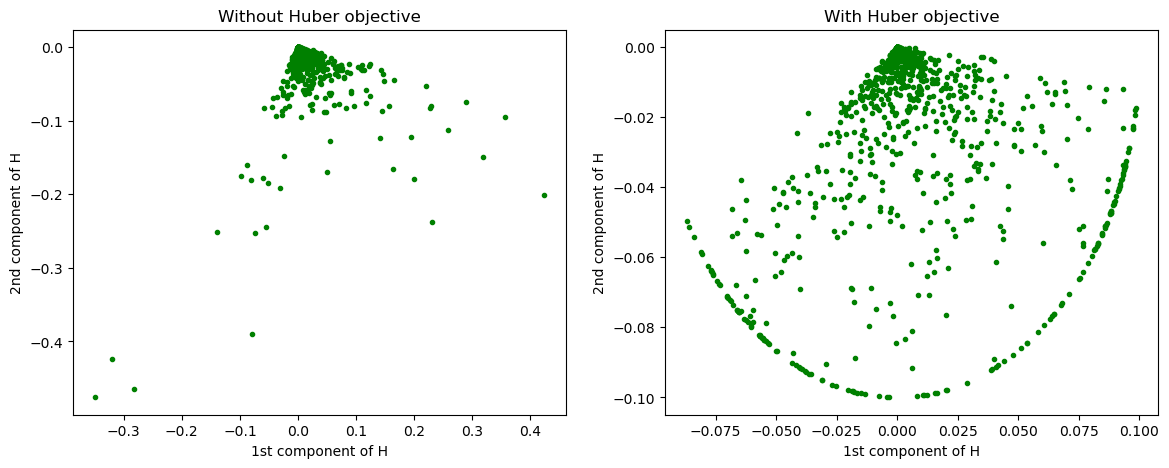

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

ax1.scatter(*model.H.detach().cpu().numpy().T, marker='.', c='green')
ax1.set_title("Without Huber objective")
ax1.set_xlabel("1st component of H")
ax1.set_ylabel("2nd component of H")


ax2.scatter(*robust.H.detach().cpu().numpy().T, marker='.', c='green')
ax2.set_title("With Huber objective")
ax2.set_xlabel("1st component of H")
ax2.set_ylabel("2nd component of H")

#fig.suptitle("Effect of Huber objective on solution to the dual problem")
fig.savefig('huber')

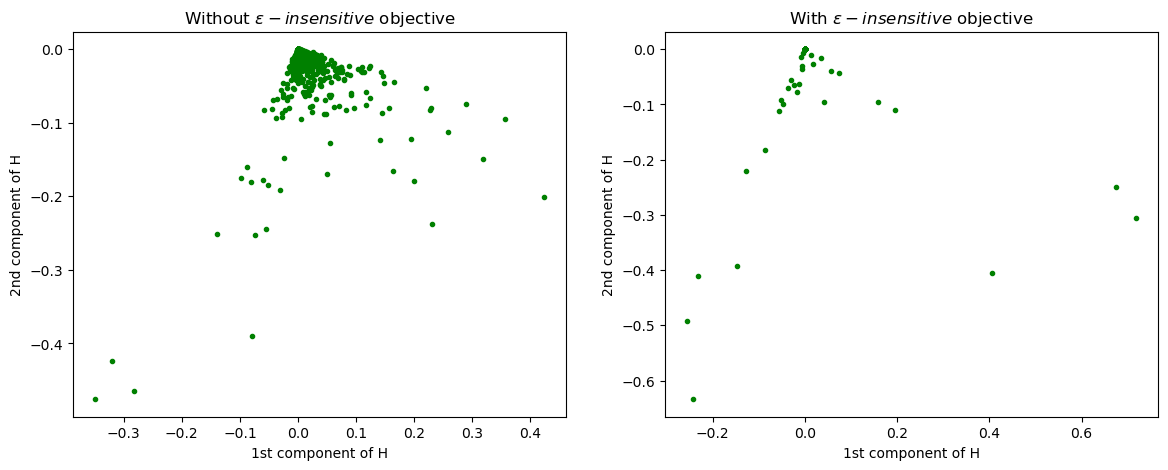

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

ax1.scatter(*model.H.detach().cpu().numpy().T, marker='.', c='green')
ax1.set_title("Without $\epsilon-insensitive$ objective")
ax1.set_xlabel("1st component of H")
ax1.set_ylabel("2nd component of H")


ax2.scatter(*sparse.H.detach().cpu().numpy().T, marker='.', c='green')
ax2.set_title("With $\epsilon-insensitive$ objective")
ax2.set_xlabel("1st component of H")
ax2.set_ylabel("2nd component of H")

fig.savefig('huber')